In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import datasets, metrics, model_selection, linear_model
import matplotlib.pyplot as plt
import seaborn as sns

def normalize(a):
    return (a - np.mean(a)) / (np.max(a) - np.min(a))

def normalizeMnist(a):
    return a / 255

def normalizeDigits(a):
    return a / 16

def accuracy(true, pred):
    a = true - pred
    return len(a[a == 0]) / len(a)

def logistic_regression(x, y, iters, alpha):
    m = len(x)
    cost = np.empty(iters)
    theta = np.zeros(x.shape[1])
    for i in range(iters):
        pred = calculate_prob(x, theta)
        cost[i] = (-1 / m) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        for j in range(x.shape[1]):
            theta[j] = theta[j] - (alpha / m) * np.sum((pred - y) * x[:, j])
    return theta, cost

def calculate_prob(x, theta):
    h = -1 * x @ theta
    p = 1 / (1 + np.exp(h))
    return p

def predict(x, theta):
    pred = calculate_prob(x, theta)
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1
    return pred

def preprocess(data, normalize):
    m = len(data)
    data_std = np.apply_along_axis(normalize, 0, data)
    data_std = np.c_[np.ones(m), data_std]
    return data_std


In [57]:
def logistic_regression_multi(x, y, iters, alpha):
    labels = np.unique(y).tolist()
    theta = np.empty((x.shape[1], len(labels)))
    cost = np.empty((iters, len(labels)))
    for i in labels:
        yCopy = np.copy(y)
        yCopy[yCopy == i] = 100
        yCopy[yCopy != 100] = 0
        yCopy[yCopy == 100] = 1
        theta[:, i], cost[:, i] = logistic_regression(x, yCopy, iters, alpha)
    
    return theta, cost

def predict_multi(x, theta):
    pred = calculate_prob(x, theta)
    pred = np.argmax(pred, axis = 1)
    return pred



In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


[[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718]
 [1.39124171 1.01476764 1.42232577 1.44062753 1.26814486 1.26640333
  1.35689033 1.25466212 1.56024644 1.37595448]
 [0.71564967 0.63960373 0.92095    0.90897488 0.87927214 0.95099441
  0.86686185 0.81342459 1.02857666 0.9426214 ]
 [0.14655527 0.28610863 0.42962497 0.39251611 0.49382749 0.636991
  0.38523255 0.38131899 0.51166695 0.51528547]
 [0.09404094 0.0888797  0.16123031 0.18668508 0.17447535 0.33686635
  0.10748526 0.11165874 0.29525001 0.21355816]
 [0.08677676 0.06284966 0.15597134 0.19573412 0.1519197  0.19791048
  0.10289296 0.10219369 0.40830361 0.20738187]
 [0.08287046 0.05983981 0.15087493 0.18298262 0.15089619 0.20093396
  0.09900134 0.09830136 0.32723554 0.20597985]
 [0.08005435 0.05870373 0.14861407 0.19546333 0.13513086 0.20005713
  0.09567284 0.09543468 0.58425987 0.20780387]
 [0.07764304 0.05777564 0.14307836 0.17163944 0.13154148 0.22751954
  0.09279064 0

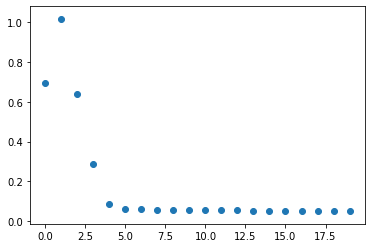

0.8217333333333333
0.8315


In [52]:
#testing Mnist dataset
x_train.shape = (x_train.shape[0], x_train[0].size)
x_test.shape = (x_test.shape[0], x_test[0].size)
x_train = preprocess(x_train, normalizeMnist)
x_test = preprocess(x_test, normalizeMnist)
iters = 100
alpha = 1
theta, cost = logistic_regression_multi(x_train, y_train, iters, alpha)
plt.scatter(np.arange(iters), cost[:, 1])
plt.show()
y_train_pred = predict_multi(x_train, theta)
y_test_pred = predict_multi(x_test, theta)
print(accuracy(y_train_pred, y_train))
print(accuracy(y_test_pred, y_test))

0.8795666666666667
0.8881


In [7]:
x_train.shape

(60000, 785)

In [8]:
x_test.shape

(10000, 785)

0.9912087912087912
0.9736842105263158


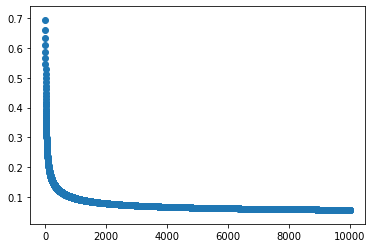

In [41]:
#testing on breast-cancer dataset
breast_cancer = datasets.load_breast_cancer()
x, y = preprocess(breast_cancer.data, normalize), breast_cancer.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
iters = 10000
alpha = 1
theta, cost = logistic_regression(x_train, y_train, iters, alpha)
# print(cost)
# print(theta)
y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)
# print(y_test_pred)
# print(y_test_pred)
print(accuracy(y_train_pred, y_train))
print(accuracy(y_test_pred, y_test))
plt.scatter(np.arange(iters), cost)
plt.show()

0.9583333333333334
0.9666666666666667


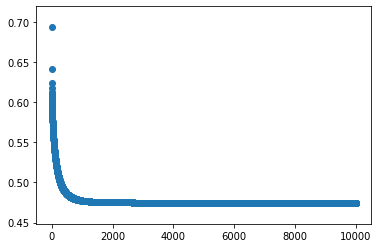

In [43]:
#testing on iris dataset
iris = datasets.load_iris()
x, y = preprocess(iris.data), iris.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
iters = 10000
alpha = 1
theta, cost = logistic_regression_multi(x_train, y_train, iters, alpha)
y_train_pred = predict_multi(x_train, theta)
y_test_pred = predict_multi(x_test, theta)
print(accuracy(y_train_pred, y_train))
print(accuracy(y_test_pred, y_test))
plt.scatter(np.arange(iters), cost[:, 1])
plt.show()

0.9846903270702854
0.975


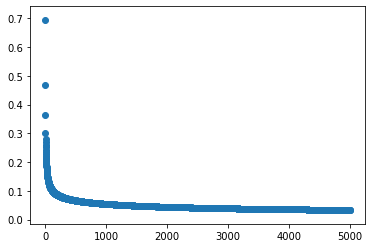

In [86]:
#testing on digits dataset
digits = datasets.load_digits()
x, y = preprocess(digits.data, normalizeDigits), digits.target
iters = 5000
alpha = 1
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 1)
theta, cost = logistic_regression_multi(x_train, y_train, iters, alpha)
y_train_pred = predict_multi(x_train, theta)
y_test_pred = predict_multi(x_test, theta)
print(accuracy(y_train_pred, y_train))
print(accuracy(y_test_pred, y_test))
plt.scatter(np.arange(iters), cost[:, 1])
plt.show()
# x = (x.shape[0], x_train[0].size)

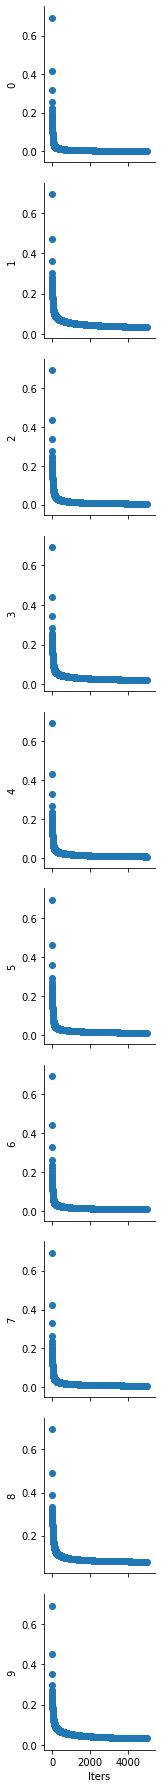

In [103]:
df = pd.DataFrame(np.c_[cost, np.arange(iters)]).rename(columns={df.columns.tolist()[-1]:'Iters'})
g = sns.pairplot(data = df, x_vars=['Iters'], y_vars=df.columns.tolist()[:-1])
g.map(plt.scatter)
plt.show()